In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('/Users/kgahliso.mokomane/learning-stuff/comp_appls_stat/module_2/data/telecom_churn.csv')

# Quick overview
print(df.head())
print(df.info())
print(df['Churn'].value_counts())

# Encode categorical columns and prepare features/target
df_encoded = pd.get_dummies(df.drop('Churn', axis=1))
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded)
y = LabelEncoder().fit_transform(df['Churn'])


  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

# --- T-SNE Visualization (Perplexity Analysis) ---


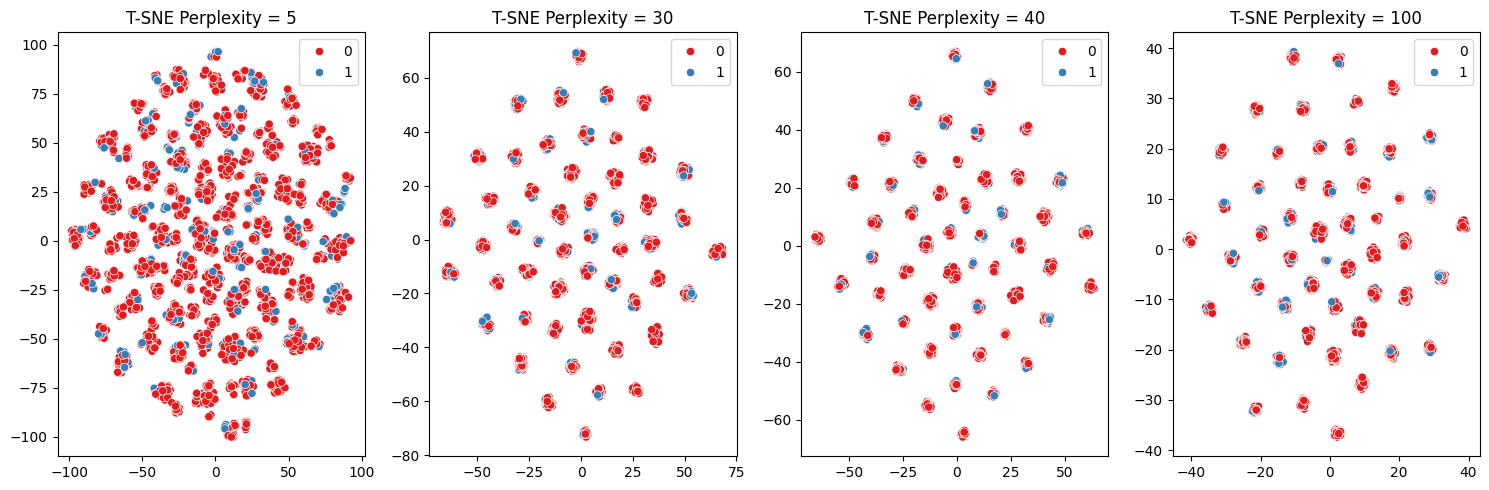

In [7]:
perplexities = [5, 30, 40, 100]
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set1', ax=axes[i])
    axes[i].set_title(f'T-SNE Perplexity = {perplexity}')

plt.tight_layout()
plt.show()

# --- Number of Principal Components and Clustering ---


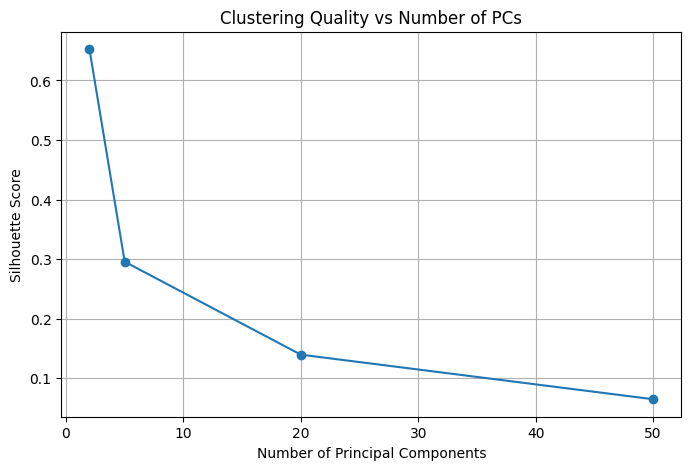

In [11]:
pca_list = [2, 5, 20, 50]
sil_scores = []

for n_components in pca_list:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    sil_score = silhouette_score(X_pca, cluster_labels)
    sil_scores.append(sil_score)

plt.figure(figsize=(8, 5))
plt.plot(pca_list, sil_scores, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Silhouette Score')
plt.title('Clustering Quality vs Number of PCs')
plt.grid(True)
plt.show()

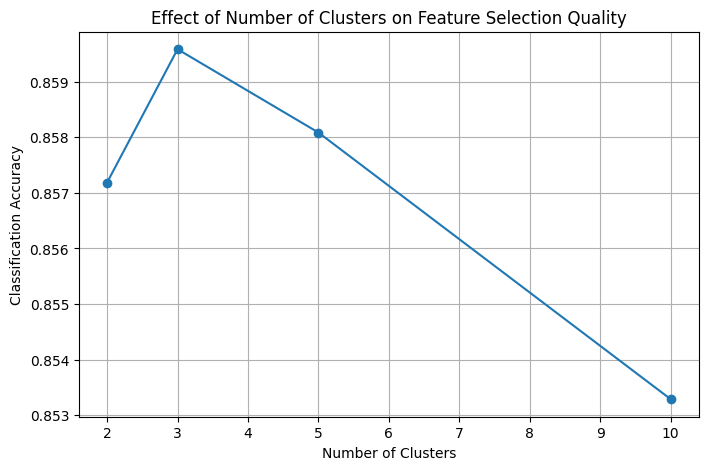

   Clusters  Accuracy                                       Top Features
0         2  0.857186  [48, 23, 15, 59, 44, 62, 53, 49, 50, 6, 8, 26,...
1         3  0.859586  [31, 43, 34, 55, 15, 24, 28, 63, 42, 1, 14, 12...
2         5  0.858086  [21, 23, 4, 66, 61, 30, 12, 14, 9, 11, 3, 5, 6...
3        10  0.853285  [17, 50, 51, 39, 66, 42, 30, 65, 2, 69, 70, 67...


In [20]:
# --- Number of Clusters for Unsupervised Feature Selection ---
cluster_counts = [2, 3, 5, 10]
feature_selection_results = []

for n_clusters in cluster_counts:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    feature_importance = np.zeros(X.shape[1])
    for cluster in range(n_clusters):
        cluster_mean = X[cluster_labels == cluster].mean(axis=0)
        overall_mean = X.mean(axis=0)
        importance = np.abs(cluster_mean - overall_mean)
        feature_importance += importance
    
    top_features = np.argsort(feature_importance)[-20:]
    
    model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
    model.fit(X[:, top_features], y)
    accuracy = model.score(X[:, top_features], y)
    
    feature_selection_results.append({
        'Clusters': n_clusters,
        'Accuracy': accuracy,
        'Top Features': top_features
    })

feature_selection_df = pd.DataFrame(feature_selection_results)

plt.figure(figsize=(8, 5))
plt.plot(feature_selection_df['Clusters'], feature_selection_df['Accuracy'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Classification Accuracy')
plt.title('Effect of Number of Clusters on Feature Selection Quality')
plt.grid(True)
plt.show()

print(feature_selection_df)